In [1]:
import distl
import numpy as np

# Multivariate Gaussian

First we'll create a [multivariate gaussian](../api/MVGaussian.md) distribution by providing the means and covariances of three parameters.

In [2]:
mvg = distl.mvgaussian([5,10, 12], 
                       np.array([[ 2,  1, -1], 
                                 [ 1,  2,  1], 
                                 [-1,  1,  2]]),
                       allow_singular=True,
                       labels=['a', 'b', 'c'])

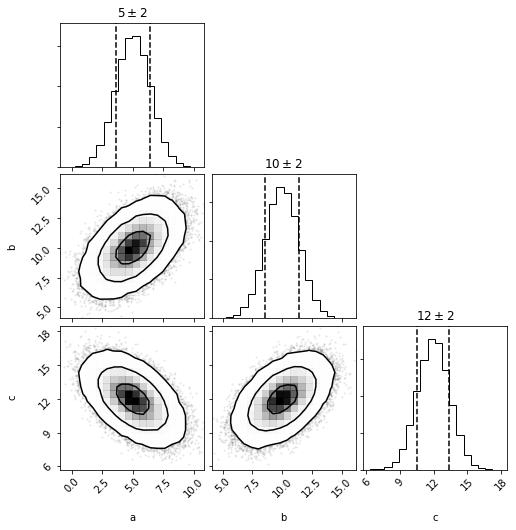

In [3]:
fig = mvg.plot(show=True)

In [4]:
mvg_a = mvg.slice('a')

In [5]:
mvg_a

<distl.mvgaussianslice dimension=0 mean=[5, 10, 12] cov=[[ 2  1 -1]
 [ 1  2  1]
 [-1  1  2]] allow_singular=True label=a)>

In [6]:
mvg_a.multivariate

<distl.mvgaussian mean=[5, 10, 12] cov=[[ 2  1 -1]
 [ 1  2  1]
 [-1  1  2]] allow_singular=True labels=['a', 'b', 'c']>

In [7]:
mvg_a.dimension

0

In [8]:
mvg_a.label

'a'

The sliced object acts more or less as the univariate version of the multivariate distribution.

In [9]:
mvg_a.loc

5

In [10]:
mvg_a.scale

1.4142135623730951

Sampling draws from the underlying multivariate distribution but only returns the value for the requested dimension.  This means that covariances can be maintained (when using [DistributionCollection](collections.ipynb) or carefully managing the random seeds manually).

In [11]:
mvg_a.sample()

7.455968009585329

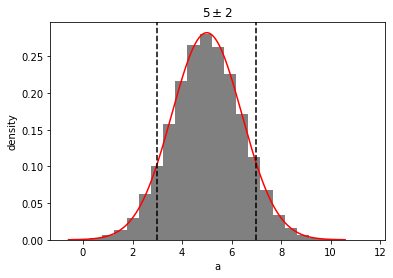

In [12]:
out = mvg_a.plot(show=True)

The exposed univariate methods (pdf, cdf, etc) are based on the univariate version (with the exception of ppf, which is disabled).  If you want the probability of drawing a value of 'a', given some values of 'b' and 'c' (for example), then must pass those three values to the underlying multivariate distribution.

**NOTE**: currently there is no ability to plot_pdf of a with fixed values of b and c.... maybe that would be a better use of "slice" and use "flatten" for this current behavior?

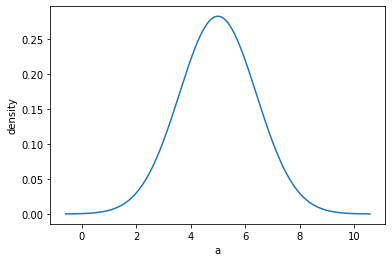

In [13]:
out = mvg_a.plot_pdf(show=True)

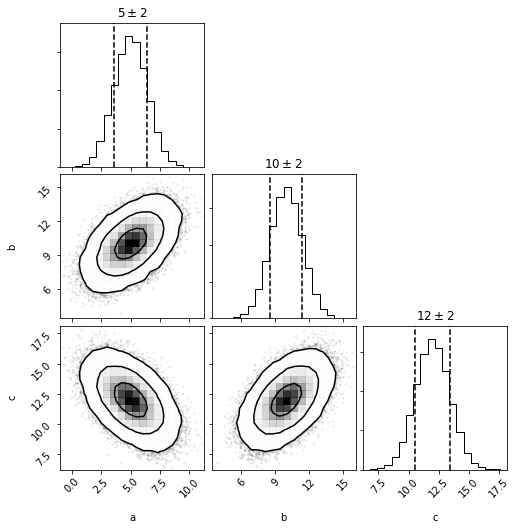

In [14]:
out = mvg_a.multivariate.plot(show=True)

In [15]:
g_a = mvg_a.to_univariate()
# same as mvg.to_univariate(dimension='a')

In [16]:
g_a

<distl.gaussian loc=5.0 scale=1.4142135623730951 label=a>

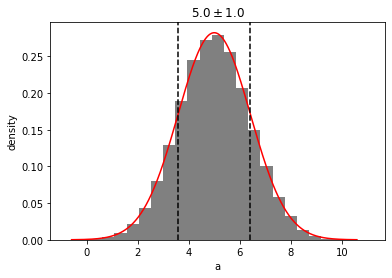

In [17]:
out = g_a.plot(show=True)

In [18]:
mvh = mvg.to_mvhistogram()

# Multivariate Histogram

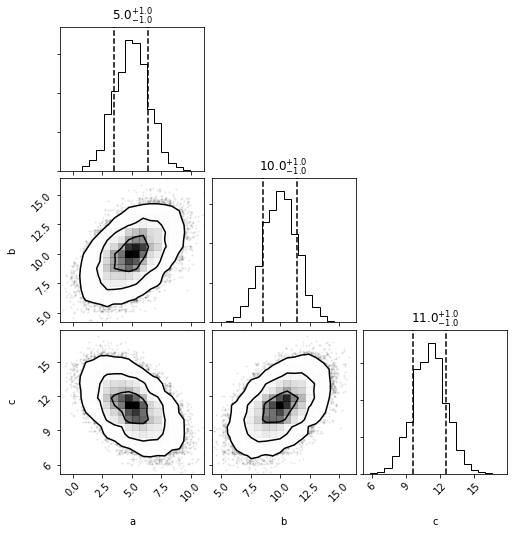

In [19]:
out = mvh.plot(show=True)

In [20]:
mvh_a = mvh.slice('a')

In [21]:
mvh_a.sample()

array([7.39157786])

In [22]:
mvh_a.sample(size=3)

array([7.20360738, 6.20109814, 4.13342284])

In [23]:
mvh_a.bins

array([-2.00694623, -1.06709382, -0.12724141,  0.812611  ,  1.7524634 ,
        2.69231581,  3.63216822,  4.57202063,  5.51187304,  6.45172545,
        7.39157786,  8.33143027,  9.27128268, 10.21113509, 11.1509875 ,
       12.09083991])

In [24]:
mvh_a.density

array([8.04597982e-06, 1.60919596e-04, 1.83314240e-03, 1.26402343e-02,
       5.42674519e-02, 1.54812698e-01, 2.87132859e-01, 3.48774451e-01,
       2.76793775e-01, 1.43459820e-01, 4.85655342e-02, 1.08486628e-02,
       1.54348713e-03, 1.43486640e-04, 1.20689697e-05])

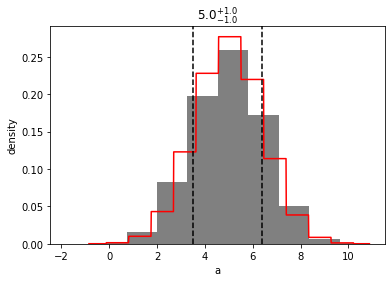

In [25]:
out = mvh_a.plot(show=True, bins=10)

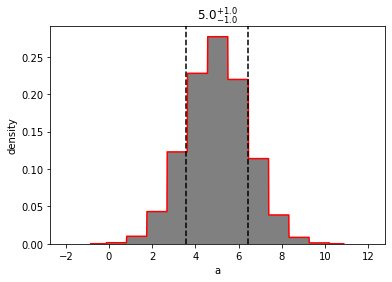

In [26]:
out = mvh_a.to_univariate().plot(show=True)